In [55]:
# Importing the libraries
import pandas as pd
import numpy as np


In [56]:
# Importing the dataset

data = pd.read_excel("/content/marketing_campaign.xlsx")

In [57]:
# viewing the dataset
print(data.shape)
data.head(5)

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [58]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [59]:
# Checking out for distribution of data for 'Income' column

import plotly.express as px
boxplot = px.box(data.dropna(subset=['Income']), x='Income')
boxplot


In [60]:
# Imputing the missing values using median because of the presence of outliers.
data['Income']=data['Income'].fillna(data['Income'].median())


In [61]:
data['Income'] = data['Income'] / 1000 
data.drop(data[(data['Income']>200)].index,inplace=True)

In [62]:
# Dropping off the columns with no importance as either all the values are unique or all the values are same.

data = data.drop(columns=['ID','Z_CostContact', 'Z_Revenue'])

In [63]:
# Trying to make the data more readable and simple by merging certain categories in the column. 

# Let's see if the values in the column can be merged. 

# Starting with education column
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [64]:
data["Education"] = data["Education"].replace(['PhD'],'Post-Graduation')
data["Education"] = data["Education"].replace(['Master'],'Post-Graduation')
data["Education"] = data["Education"].replace(['Basic'],'Under-Graduation')
data["Education"] = data["Education"].replace(['2n Cycle'],'Graduation')

In [65]:
# Checking Marital status column

data['Marital_Status'].unique()


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [66]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

data.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58.138,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46.344,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Relationship,71.613,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Relationship,26.646,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,Post-Graduation,Relationship,58.293,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [67]:
# Adding the similar column categories. 
data['Child'] = data['Kidhome'] + data['Teenhome']

data['Total_Sales'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

data['No_TotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [68]:
# Dropping the columns that are extra after merginng

#marketing_data
data = data.drop(columns=['Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases','Response'])

In [69]:
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,AcceptedCmp1,Complain,Child,Total_Sales,No_TotalPurchases
0,1957,Graduation,Single,58.138,2012-09-04,58,7,0,0,0,1617,25
1,1954,Graduation,Single,46.344,2014-03-08,38,5,0,0,2,27,6
2,1965,Graduation,Relationship,71.613,2013-08-21,26,4,0,0,0,776,21
3,1984,Graduation,Relationship,26.646,2014-02-10,26,6,0,0,1,53,8
4,1981,Post-Graduation,Relationship,58.293,2014-01-19,94,5,0,0,1,422,19


In [70]:
data.dtypes

Year_Birth             int64
Education             object
Marital_Status        object
Income               float64
Dt_Customer           object
Recency                int64
NumWebVisitsMonth      int64
AcceptedCmp1           int64
Complain               int64
Child                  int64
Total_Sales            int64
No_TotalPurchases      int64
dtype: object

In [71]:
# Changing the datatypes to 

data['Education'] = data['Education'].astype('string')
data['Marital_Status'] = data['Marital_Status'].astype('string')


In [72]:
data.dtypes

Year_Birth             int64
Education             string
Marital_Status        string
Income               float64
Dt_Customer           object
Recency                int64
NumWebVisitsMonth      int64
AcceptedCmp1           int64
Complain               int64
Child                  int64
Total_Sales            int64
No_TotalPurchases      int64
dtype: object

In [73]:
from datetime import date
today = date.today().year
data['Age'] = today-data.Year_Birth.to_numpy()

In [74]:
import plotly.express as px
boxplot = px.box(data.dropna(subset=['Age']), x='Age')
boxplot

In [75]:
# Dropping the year_birth col after adding age col
data = data.drop(columns=['Year_Birth'])

In [76]:
# Dropping the 3 age outlier data points 
data.drop(data[data['Age']>100].index,inplace=True)

In [77]:
# Getting the period of cusotmer's subscription 
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
data['today_date'] = pd.to_datetime(date.today())
data['Cust_duration'] = (data['today_date'] - data['Dt_Customer']).dt.days

# Dropping extra cols

data.drop('today_date', axis=1, inplace=True)
data.drop('Dt_Customer', axis=1, inplace=True)



In [78]:
data.head(50)

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp1,Complain,Child,Total_Sales,No_TotalPurchases,Age,Cust_duration
0,Graduation,Single,58.1380,58,7,0,0,0,1617,25,65,3729
1,Graduation,Single,46.3440,38,5,0,0,2,27,6,68,3179
2,Graduation,Relationship,71.6130,26,4,0,0,0,776,21,57,3378
3,Graduation,Relationship,26.6460,26,6,0,0,1,53,8,38,3205
4,Post-Graduation,Relationship,58.2930,94,5,0,0,1,422,19,41,3227
5,Post-Graduation,Relationship,62.5130,16,6,0,0,1,716,22,55,3359
6,Graduation,Single,55.6350,34,6,0,0,1,590,21,51,3659
7,Post-Graduation,Relationship,33.4540,32,8,0,0,1,169,10,37,3483
8,Post-Graduation,Relationship,30.3510,19,9,0,0,1,46,6,48,3454
9,Post-Graduation,Relationship,5.6480,68,20,0,0,2,49,2,72,3174


In [79]:
data = pd.get_dummies(data, columns=['Education','Marital_Status'], drop_first=False, dummy_na=False)
#marketing_data = pd.get_dummies(marketing_data, columns=['Education'], drop_first=False, dummy_na=False)

In [80]:
data.head(5)
print(data.shape)

(2236, 15)


In [81]:
# Separating the features and target variable
y=data[['AcceptedCmp1']]
X=data.drop(['AcceptedCmp1'],axis=1)

#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [82]:
import warnings
warnings.filterwarnings('ignore')

# Getting the summary after logistic regression
import statsmodels.api as sm
const = sm.add_constant(x_train)

logit_model=sm.Logit(y_train,const)
result=logit_model.fit()
print(result.summary())


         Current function value: 0.152649
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1788
Model:                          Logit   Df Residuals:                     1774
Method:                           MLE   Df Model:                           13
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.3439
Time:                        22:34:52   Log-Likelihood:                -272.94
converged:                      False   LL-Null:                       -415.99
Covariance Type:            nonrobust   LLR p-value:                 1.938e-53
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.1316   6.94e+06  -3.07e-07      1.000   -1.36e+07    1.36e+07
Income        

In [83]:
# Getting confusion metrics
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[408,   7],
       [ 27,   6]])

In [84]:
# Getting the accuracy score of the model
log_reg = LogisticRegression()
log_model = logreg.fit(X, y)

log_model.score(x_test, y_test)

0.9241071428571429

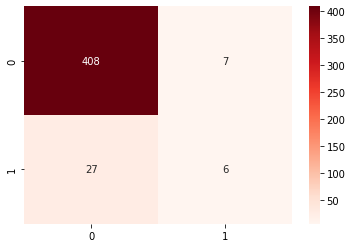

In [85]:
# Visualizing the confusion matrix
import seaborn as sns
sns.heatmap(cnf_matrix,annot=True,fmt='d',cmap='Reds')

In [86]:
# Getting the classfification report
from sklearn.metrics import classification_report
print(classification_report(y_test,log_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       415
           1       0.46      0.18      0.26        33

    accuracy                           0.92       448
   macro avg       0.70      0.58      0.61       448
weighted avg       0.90      0.92      0.91       448



**Performing SVM Model**

In [93]:
#importing the library
from sklearn import svm
svm_model = svm.SVC(kernel='linear') 

In [94]:
#fitting the model
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [95]:
#getting the confusion matrix
y_pred = svm_model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[414,   1],
       [ 31,   2]])

In [96]:
# Getting the accuracy score
svm_model.score(x_test, y_test)

0.9285714285714286

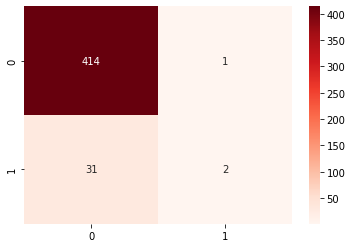

In [97]:
# Visualizing the confusion matrix for SVM model
sns.heatmap(cnf_matrix,annot=True,fmt='d',cmap='Reds')

In [92]:
# Getting the classification report for SVM Model
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       415
           1       0.67      0.06      0.11        33

    accuracy                           0.93       448
   macro avg       0.80      0.53      0.54       448
weighted avg       0.91      0.93      0.90       448

